<a href="https://colab.research.google.com/github/RaoSaeed836/100_Day-s_DL/blob/main/Breast_Cancer_Wisconsin_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint


In [9]:
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model=Sequential()
model.add(Dense(256,activation='relu',input_dim=30))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [59]:
early_stop = EarlyStopping(
    monitor='val_loss',       # Monitor validation loss
    patience=3,               # Stop after 3 epochs with no improvement
    restore_best_weights=True, # Restore best model weights
    verbose=1,
    mode="min"
)

In [61]:
X_train.shape

(455, 30)

In [82]:
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2,callbacks=early_stop)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9199 - loss: 0.2340 - val_accuracy: 0.9121 - val_loss: 0.2495
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9187 - loss: 0.2305 - val_accuracy: 0.8791 - val_loss: 0.2778
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9384 - loss: 0.1768 - val_accuracy: 0.9011 - val_loss: 0.2444
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9154 - loss: 0.2359 - val_accuracy: 0.9011 - val_loss: 0.2602
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9166 - loss: 0.1979 - val_accuracy: 0.9011 - val_loss: 0.2412
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9364 - loss: 0.1750 - val_accuracy: 0.9011 - val_loss: 0.2389
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9327 - loss: 0.1824 - val_accuracy: 0.9011 - val_loss: 0.2378
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9325 - loss: 0.1877 - val_accuracy: 0.

In [83]:
y_prob=model.predict(X_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [84]:
threshold = 0.5
y_pred = (y_prob > threshold).astype(int)


In [40]:
# print("MSE",mean_squared_error(y_pred,y_test))
# print("MAE",mean_absolute_error(y_pred,y_test))
print("r2_score is",r2_score(y_pred,y_test))
# print("RMSE",root_mean_squared_error(y_pred,y_test))

r2_score is 0.7661538461538462


In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# y_true = actual labels (0 or 1)
# y_pred = predicted labels (0 or 1)
# y_prob = predicted probabilities (0.0 to 1.0)

print("Accuracy      :", accuracy_score(y_test, y_pred))
print("Precision     :", precision_score(y_test, y_pred))
print("Recall        :", recall_score(y_test, y_pred))
print("F1 Score      :", f1_score(y_test, y_pred))
print("ROC AUC Score :", roc_auc_score(y_test, y_prob))


Accuracy      : 0.9473684210526315
Precision     : 0.9452054794520548
Recall        : 0.971830985915493
F1 Score      : 0.9583333333333334
ROC AUC Score : 0.9950867998689813


In [74]:
# Save entire model to HDF5 file
dffd=model.save('breast_cancer_model.h5')


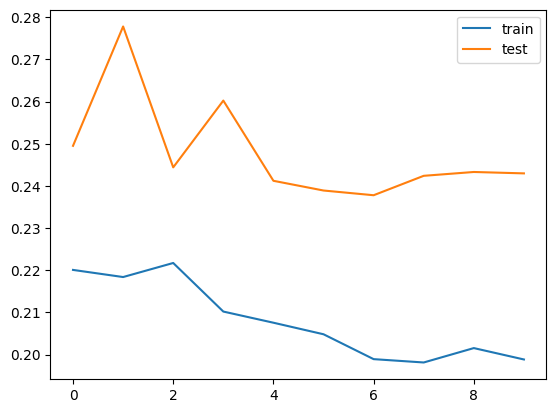

In [86]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()


In [76]:
import matplotlib.pyplot as plt


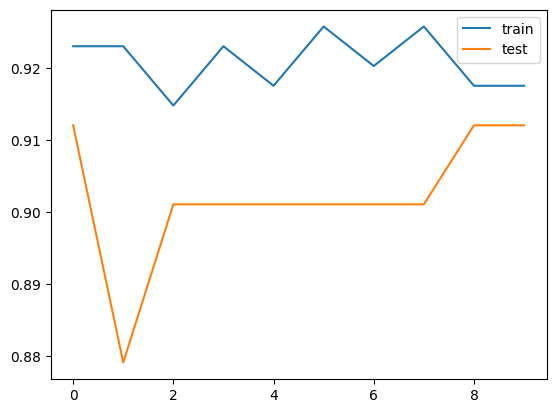

In [87]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()
